In [38]:
from jikanpy import Jikan
import json
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Jikan with the v4 base URL
jikan = Jikan(selected_base='https://api.jikan.moe/v4')

In [39]:
jikan = Jikan()

# Placeholder for the extracted data
extracted_data = []

# Define the year ranges you want to fetch data for
year_ranges = [(1917,1989), (1990, 1995), (1996, 2000), (2001, 2005), (2006, 2010), (2011, 2015), (2016, 2020), (2021, 2024)]

# Function to fetch and process anime data within a given year range
def fetch_anime_data(start_year, end_year):
    page = 1
    while True:
        try:
            # Fetch data from the API
            response = jikan.search('anime', '', page=page, parameters={
                'start_date': f'{start_year}-01-01',
                'end_date': f'{end_year}-12-31',
                'type': 'tv',
            })
            
            # Process each anime in the current page's response
            for anime in response['data']:
                mal_id = anime.get('mal_id')
                score = anime.get('score')
                rank = anime.get('rank')
                popularity = anime.get('popularity')
                season = anime.get('season')
                year = anime.get('year')
                
                # Extracting titles
                title_default = None
                title_japanese = None

                for title_entry in anime.get('titles', []):
                    if title_entry['type'] == 'Default':
                        title_default = title_entry['title']
                    elif title_entry['type'] == 'Japanese':
                        title_japanese = title_entry['title']

                # Extract all genre names as a comma-separated string
                genres = ', '.join([genre['name'] for genre in anime.get('genres', [])])
                
                # Extract all demographic names as a comma-separated string
                demographics = ', '.join([demographic['name'] for demographic in anime.get('demographics', [])])
                
                # Append the extracted information as a tuple to the list
                extracted_data.append((mal_id, title_default, title_japanese, score, rank, popularity, season, year, genres, demographics))

            
            # Check if there's another page
            if not response['pagination']['has_next_page']:
                break
            
            # Move to the next page
            page += 1
            
            # Respect the rate limit
            time.sleep(1.2)  # Slightly more than 1 second to ensure we're under the limit
            
        except Exception as e:
            print(f"An error occurred: {e}")
            break

In [40]:
# Fetch data for each defined year range
for start_year, end_year in year_ranges:
    print(f"Fetching data from {start_year} to {end_year}...")
    fetch_anime_data(start_year, end_year)

# Convert the list of tuples to a pandas DataFrame
df = pd.DataFrame(extracted_data, columns=[
    'mal_id', 'title_default', 'title_japanese', 'score', 'rank', 'popularity', 'season', 'year', 'genres','demographics'
])

Fetching data from 1917 to 1989...
Fetching data from 1990 to 1995...
Fetching data from 1996 to 2000...
Fetching data from 2001 to 2005...
Fetching data from 2006 to 2010...
Fetching data from 2011 to 2015...
Fetching data from 2016 to 2020...
Fetching data from 2021 to 2024...


In [41]:
df

,mal_id,title_default,title_japanese,score,rank,popularity,season,year,genres,demographics
0,80,Kidou Senshi Gundam,機動戦士ガンダム,7.75,1108.0,1691,spring,1979.0,"Action, Drama, Sci-Fi",
1,85,Kidou Senshi Zeta Gundam,機動戦士Ζガンダム,7.89,808.0,2499,spring,1985.0,"Action, Drama, Romance, Sci-Fi",
2,86,Kidou Senshi Gundam ZZ,機動戦士ガンダムZZ,6.65,5964.0,3382,spring,1986.0,"Action, Comedy, Drama, Sci-Fi",
3,223,Dragon Ball,ドラゴンボール,7.97,677.0,149,winter,1986.0,"Action, Adventure, Comedy, Fantasy",Shounen
4,283,Akage no Anne,赤毛のアン,7.79,1021.0,3881,winter,1979.0,Drama,
...,...,...,...,...,...,...,...,...,...,...
5420,59147,Tobot V: Ujusuhodae,또봇V 우주수호대,NaN,14301.0,26969,spring,2021.0,"Action, Sci-Fi",Kids
5421,59583,Shasha and Milo Part 2,샤샤&마일로 NEW에피소드,NaN,13482.0,26989,spring,2024.0,"Action, Adventure, Comedy",Kids
5422,59586,Jyulagi Cops 3rd Season,쥬라기 캅스3,NaN,15843.0,27093,fall,2021.0,Action,Kids
5423,59649,Nanashi Kaidan 3rd Season,ななし怪談 第3作,NaN,17265.0,21212,summer,2024.0,"Horror, Supernatural",


In [42]:


# Get the current working directory (which should be your project root)
script_dir = os.path.dirname(os.path.realpath('AnimeArc.ipynb'))

# Construct the path to the 'data' directory relative to the project root
data_dir = os.path.join(script_dir, '..', 'data')

# Ensure the data directory exists
os.makedirs(data_dir, exist_ok=True)

# Define the file path for saving your DataFrame with UTF-8 encoding
file_path = os.path.join(data_dir, 'anime_data.xlsx')
file_path2 = os.path.join(data_dir, 'anime_data.csv')

# Save your DataFrame to the file
df.to_excel(file_path, index=False, engine='openpyxl')
df.to_csv(file_path2, index=False, encoding='utf-8-sig')

print(f"Data saved to {file_path} & {file_path2}.")


Data saved to C:\Users\spata\Documents\GitHub\animearc_gc\nb\..\data\anime_data.xlsx & C:\Users\spata\Documents\GitHub\animearc_gc\nb\..\data\anime_data.csv.


In [43]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mal_id          5425 non-null   int64  
 1   title_default   5425 non-null   object 
 2   title_japanese  5420 non-null   object 
 3   score           4431 non-null   float64
 4   rank            5417 non-null   float64
 5   popularity      5425 non-null   int64  
 6   season          5311 non-null   object 
 7   year            5311 non-null   float64
 8   genres          5425 non-null   object 
 9   demographics    5425 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 424.0+ KB
None
             mal_id        score          rank    popularity         year
count   5425.000000  4431.000000   5417.000000   5425.000000  5311.000000
mean   24115.061567     6.830257   7533.625438   7762.638525  2008.859537
std    18771.340739     0.812594   5642.082382   7084.962033  

In [44]:
missing_data_report = df.isnull().sum()
print(missing_data_report)

mal_id              0
title_default       0
title_japanese      5
score             994
rank                8
popularity          0
season            114
year              114
genres              0
demographics        0
dtype: int64


In [45]:
df_with_score = df[df['score'].notna()]
df_with_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4431 entries, 0 to 5418
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mal_id          4431 non-null   int64  
 1   title_default   4431 non-null   object 
 2   title_japanese  4428 non-null   object 
 3   score           4431 non-null   float64
 4   rank            4423 non-null   float64
 5   popularity      4431 non-null   int64  
 6   season          4422 non-null   object 
 7   year            4422 non-null   float64
 8   genres          4431 non-null   object 
 9   demographics    4431 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 380.8+ KB


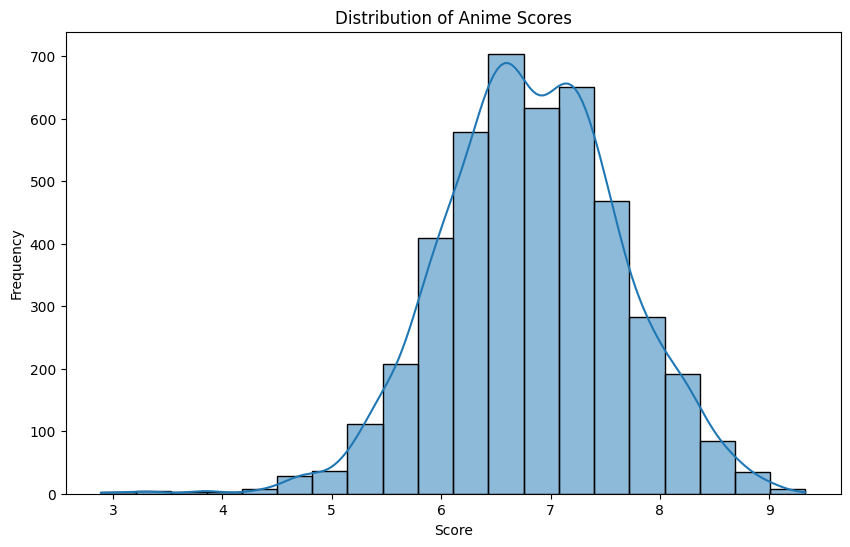

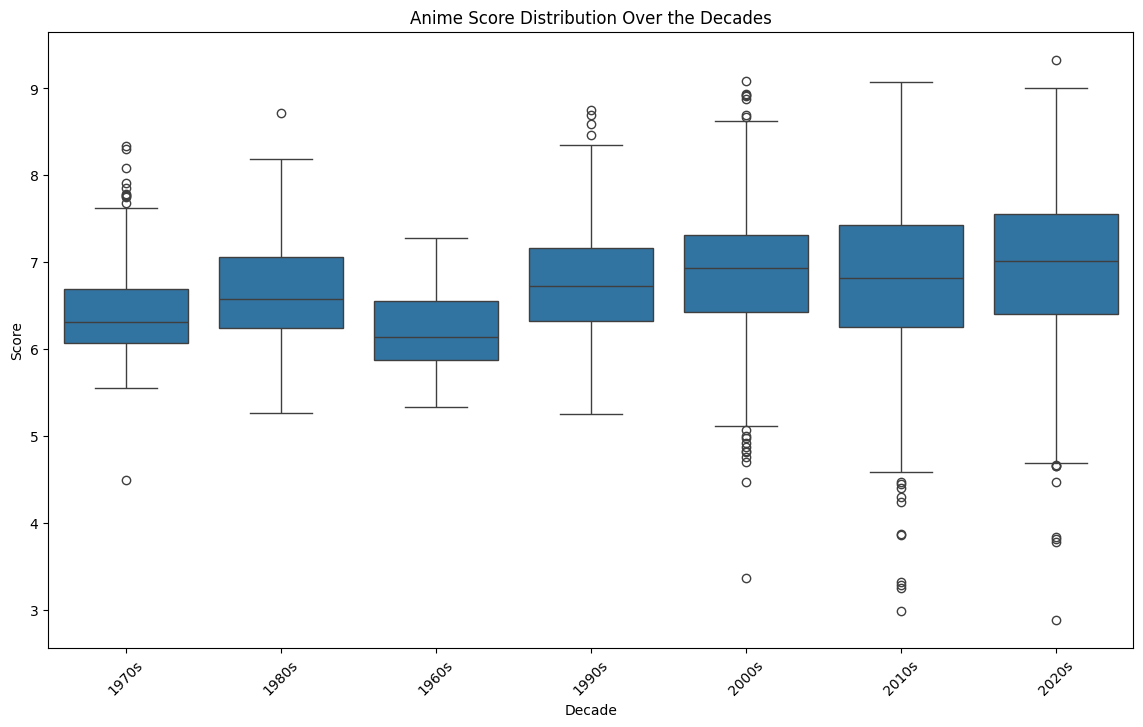

In [46]:


# Plotting the histogram of scores
plt.figure(figsize=(10, 6))
sns.histplot(df_with_score['score'], bins=20, kde=True)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Filter out anime without year
df_with_score_year = df_with_score[df_with_score['year'].notna()]

df_with_score_year = df_with_score_year.copy()

# Convert year to decade
df_with_score_year['decade'] = ((df_with_score_year['year'] // 10) * 10).astype(int)

df_with_score_year['dec_label'] = df_with_score_year['decade'].astype(str) + 's'

# Plotting the score distribution over the years using a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='dec_label', y='score', data=df_with_score_year)
plt.title('Anime Score Distribution Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### Analysis of the Distribution of Anime Scores

#### 1. **Score Distribution Histogram (First Graph):**
   - **Normal Distribution:** The histogram of anime scores appears to follow a roughly normal distribution, with the majority of scores centered around 6 to 8. This suggests that most animes tend to receive moderate to good ratings.
   - **Peak Scores:** The most frequent scores fall between 6.5 and 7.5, indicating that the average anime tends to receive a decent score, neither too high nor too low.
   - **Long Tail:** There is a noticeable tail towards both lower and higher scores. This indicates the presence of both underperforming animes (scores below 6) and highly rated animes (scores above 8), but these are less common compared to those that score in the middle range.

#### 2. **Anime Score Distribution Over the Decades (Second Graph):**
   - **1970s to 1980s:**
     - **Score Stability:** The median scores in these decades are relatively consistent, hovering around 6 to 7.
     - **Lower Range of Scores:** The spread of scores in these decades is tighter, with fewer low-scoring animes. This could indicate that early anime productions were more consistent in quality.
   - **1990s:**
     - **Wider Distribution:** The scores start to show more variability, with a broader range from about 5 to 8.5. This suggests increasing diversity in anime quality during this period, with some productions starting to stand out more.
     - **Higher Upper Quartile:** The top 25% of animes from this decade scored noticeably higher, which might reflect the rise of iconic and influential animes during this period.
   - **2000s to 2020s:**
     - **Increased Variability:** The score distribution continues to widen, especially in the lower scores. This could indicate a greater variety of anime content, including niche genres or lower-budget productions that don't always score well.
     - **Higher Median Scores in Recent Decades:** Despite the variability, the median scores in the 2000s and 2010s are higher than in previous decades. This could suggest an improvement in overall anime quality or a change in audience expectations and scoring behavior.
     - **More Outliers:** The recent decades show more outliers, particularly in the lower end, indicating a few very low-scoring animes. This could be due to increased anime production, leading to more variability in quality.

### Key Insights:
   - **Improvement Over Time:** The median score has increased slightly in recent decades, indicating potential improvements in anime quality or changes in scoring criteria.
   - **Diversity in Quality:** The increased spread of scores, especially in the 2000s and 2010s, shows that while there are highly rated animes, there is also a significant number of lower-rated ones, reflecting greater diversity in production.
   - **Consistency in Early Years:** The 1970s and 1980s show less variability in scores, possibly indicating more consistent production quality or a smaller number of releases.
   - **Impact of Iconic Animes:** The 1990s show a notable increase in higher scores, possibly due to the release of several influential animes that shaped the industry.


In [47]:
demo = df.groupby(['demographics']).size().reset_index(name='count')
demo

,demographics,count
0,,3088
1,Josei,75
2,Kids,949
3,"Kids, Shoujo",2
4,"Kids, Shounen",4
5,Seinen,404
6,Shoujo,185
7,Shounen,718


In [55]:
print(df['rank'].min())
print(df['rank'].max())
print(df['score'].min())
print(df['score'].max())
print(df['popularity'].min())
print(df['popularity'].max())

1.0
20920.0
2.89
9.33
1
27109


In [58]:
pop_10 = df.nsmallest(10, 'popularity')
pop_10

,mal_id,title_default,title_japanese,score,rank,popularity,season,year,genres,demographics
2643,16498,Shingeki no Kyojin,進撃の巨人,8.55,109.0,1,spring,2013.0,"Action, Award Winning, Drama, Suspense",Shounen
1585,1535,Death Note,デスノート,8.62,84.0,2,fall,2006.0,"Supernatural, Suspense",Shounen
1928,5114,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.09,2.0,3,spring,2009.0,"Action, Adventure, Drama, Fantasy",Shounen
3091,30276,One Punch Man,ワンパンマン,8.49,142.0,4,fall,2015.0,"Action, Comedy",Seinen
2456,11757,Sword Art Online,ソードアート・オンライン,7.21,3196.0,5,summer,2012.0,"Action, Adventure, Fantasy, Romance",
4122,38000,Kimetsu no Yaiba,鬼滅の刃,8.46,152.0,6,spring,2019.0,"Action, Award Winning, Fantasy",Shounen
3432,31964,Boku no Hero Academia,僕のヒーローアカデミア,7.85,885.0,7,spring,2016.0,Action,Shounen
2422,11061,Hunter x Hunter (2011),HUNTER×HUNTER（ハンター×ハンター）,9.03,8.0,9,fall,2011.0,"Action, Adventure, Fantasy",Shounen
2864,22319,Tokyo Ghoul,東京喰種-トーキョーグール-,7.79,1014.0,10,summer,2014.0,"Action, Fantasy, Horror, Suspense",Seinen
3335,25777,Shingeki no Kyojin Season 2,進撃の巨人 Season2,8.52,124.0,12,spring,2017.0,"Action, Drama, Suspense",Shounen


In [57]:
rank_10 = df.nsmallest(10, 'rank')
rank_10

,mal_id,title_default,title_japanese,score,rank,popularity,season,year,genres,demographics
5148,52991,Sousou no Frieren,葬送のフリーレン,9.33,1.0,212,fall,2023.0,"Adventure, Drama, Fantasy",Shounen
1928,5114,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.09,2.0,3,spring,2009.0,"Action, Adventure, Drama, Fantasy",Shounen
2299,9253,Steins;Gate,STEINS;GATE,9.07,3.0,14,spring,2011.0,"Drama, Sci-Fi, Suspense",
4183,38524,Shingeki no Kyojin Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,5.0,21,spring,2019.0,"Action, Drama, Suspense",Shounen
2330,9969,Gintama',銀魂',9.03,7.0,395,spring,2011.0,"Action, Comedy, Sci-Fi",Shounen
2422,11061,Hunter x Hunter (2011),HUNTER×HUNTER（ハンター×ハンター）,9.03,8.0,9,fall,2011.0,"Action, Adventure, Fantasy",Shounen
2596,15417,Gintama': Enchousen,銀魂' 延長戦,9.02,9.0,744,fall,2012.0,"Action, Comedy, Sci-Fi",Shounen
4653,41467,Bleach: Sennen Kessen-hen,BLEACH 千年血戦篇,9.01,10.0,393,fall,2022.0,"Action, Adventure, Fantasy",Shounen
4724,43608,Kaguya-sama wa Kokurasetai: Ultra Romantic,かぐや様は告らせたい-ウルトラロマンティック-,9.00,12.0,171,spring,2022.0,"Comedy, Romance",Seinen
3656,34096,Gintama.,銀魂。,8.98,14.0,770,winter,2017.0,"Action, Comedy, Sci-Fi",Shounen


In [53]:
score_10 = df.nlargest(10, 'score')
score_10

,mal_id,title_default,title_japanese,score,rank,popularity,season,year,genres,demographics
5148,52991,Sousou no Frieren,葬送のフリーレン,9.33,1.0,212,fall,2023.0,"Adventure, Drama, Fantasy",Shounen
1928,5114,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.09,2.0,3,spring,2009.0,"Action, Adventure, Drama, Fantasy",Shounen
2299,9253,Steins;Gate,STEINS;GATE,9.07,3.0,14,spring,2011.0,"Drama, Sci-Fi, Suspense",
4183,38524,Shingeki no Kyojin Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,5.0,21,spring,2019.0,"Action, Drama, Suspense",Shounen
2330,9969,Gintama',銀魂',9.03,7.0,395,spring,2011.0,"Action, Comedy, Sci-Fi",Shounen
2422,11061,Hunter x Hunter (2011),HUNTER×HUNTER（ハンター×ハンター）,9.03,8.0,9,fall,2011.0,"Action, Adventure, Fantasy",Shounen
2596,15417,Gintama': Enchousen,銀魂' 延長戦,9.02,9.0,744,fall,2012.0,"Action, Comedy, Sci-Fi",Shounen
4653,41467,Bleach: Sennen Kessen-hen,BLEACH 千年血戦篇,9.01,10.0,393,fall,2022.0,"Action, Adventure, Fantasy",Shounen
4724,43608,Kaguya-sama wa Kokurasetai: Ultra Romantic,かぐや様は告らせたい-ウルトラロマンティック-,9.00,12.0,171,spring,2022.0,"Comedy, Romance",Seinen
3656,34096,Gintama.,銀魂。,8.98,14.0,770,winter,2017.0,"Action, Comedy, Sci-Fi",Shounen
